In [1]:
import numpy as np
import math
from scipy.stats import norm

from src.options import Option, OptionCombination, Straddle, Strangle, Butterfly, Condor

[-1.9886584533807363,
 -0.9886584533807364,
 0.011341546619263565,
 0.011341546619263565,
 0.011341546619263565,
 0.011341546619263565,
 0.011341546619263565,
 0.011341546619263565,
 0.011341546619263565,
 0.011341546619263565,
 0.011341546619263565,
 0.011341546619263565,
 0.011341546619263565,
 -0.9886584533807364,
 -1.9886584533807365]

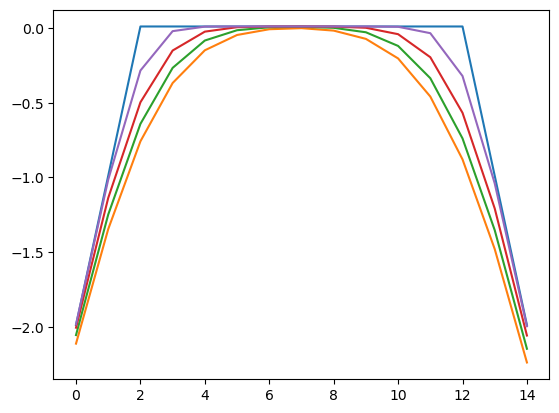

In [52]:
S = 100
K = 100
T = 7/365
r = 0.02
sigma = 0.15

strangle = Strangle(S, S*0.95, S*1.05, T, r, sigma, 'short')

range_idx = np.arange(S*0.93, S* 1.08, 1)


pnl_strangle  = [strangle.pnl_at_expiry(range_i) for range_i in range_idx]

pnl_strangle
val7 = [strangle.current_value(7/365, range_i) for range_i in range_idx]
val5 = [strangle.current_value(5/365, range_i) for range_i in range_idx]
val3 = [strangle.current_value(3/365, range_i) for range_i in range_idx]
val1 = [strangle.current_value(1/365, range_i) for range_i in range_idx]


plt.plot(pnl_strangle)
plt.plot(val7)
plt.plot(val5)
plt.plot(val3)
plt.plot(val1)

pnl_strangle

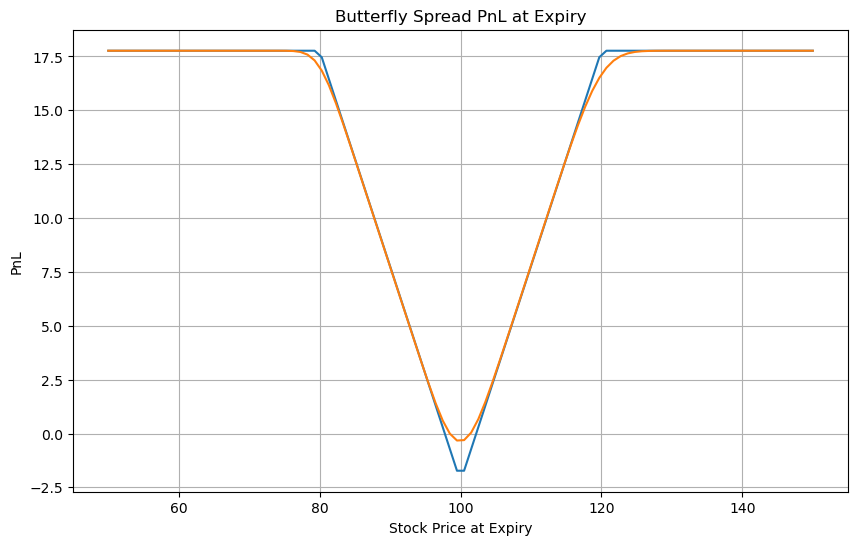

In [3]:
S = 100  # Initial stock price
K_low = 80  # Lower strike price
K_mid = 100  # Middle strike price
K_high = 120  # Higher strike price
T = 7/360  # One year until expiration
r = 0.02  # Risk-free rate
sigma = 0.2  # Volatility

butterfly = Butterfly(S, K_low, K_mid, K_high, T, r, sigma, "short")

stock_prices = np.linspace(50, 150, 100)
butterfly_pnl = [butterfly.pnl_at_expiry(spot) for spot in stock_prices]
butterfly_val = [butterfly.current_value(5/365, spot) for spot in stock_prices]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(stock_prices, butterfly_pnl)
plt.plot(stock_prices, butterfly_val)
plt.title('Butterfly Spread PnL at Expiry')
plt.xlabel('Stock Price at Expiry')
plt.ylabel('PnL')
plt.grid(True)
plt.show()

# plt.plot(np.zeros(len(range_idx)))

In [62]:
butterfly.break_even_prices()

(97.7673184257348, 102.2326815742652)

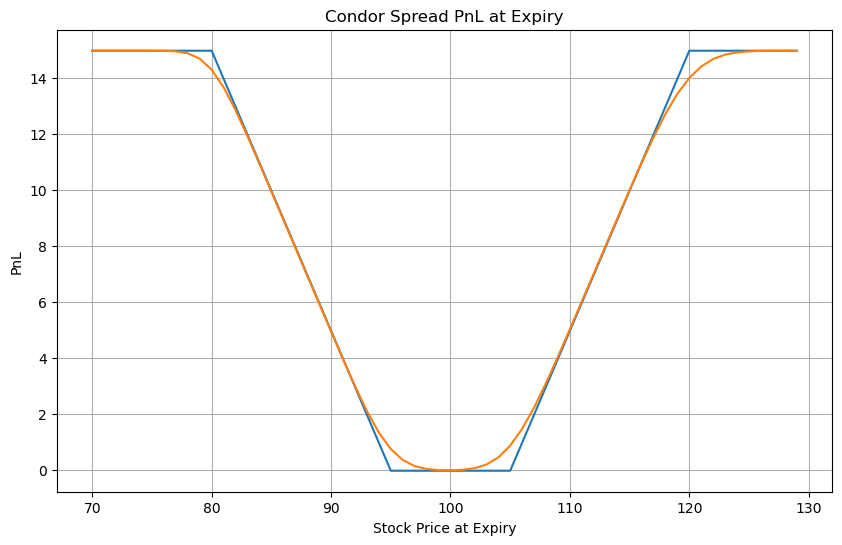

[-0.017093868021361258,
 -0.017093868021361258,
 -0.017093868021361258,
 -0.017093868021361258,
 -0.017093868021361258,
 -0.017093868021361258,
 -0.017093868021361258,
 -0.017093868021361258,
 0.9829061319786387,
 1.9829061319786387,
 2.9829061319786385,
 3.9829061319786385,
 4.9829061319786385,
 5.9829061319786385,
 6.9829061319786385,
 7.9829061319786385,
 8.98290613197864,
 9.98290613197864,
 10.98290613197864,
 11.98290613197864,
 12.98290613197864,
 13.98290613197864,
 14.98290613197864,
 14.98290613197864,
 14.982906131978638,
 14.982906131978638,
 14.982906131978638,
 14.982906131978638,
 14.982906131978638,
 14.982906131978638,
 14.982906131978638,
 14.982906131978638]

In [5]:
S = 100
K = 100
T = 7/365
r = 0.02
sigma = 0.15

condor = Condor(S, S*0.8, S*0.95, S*1.05, S*1.2, T, r, sigma, 'short')


stock_prices = np.arange(70, 130, 1)
condor_pnl = [condor.pnl_at_expiry(spot) for spot in stock_prices]
condor_val = [condor.current_value(T, spot)  for spot in stock_prices]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(stock_prices, condor_pnl)
plt.plot(stock_prices, condor_val)
plt.title('Condor Spread PnL at Expiry')
plt.xlabel('Stock Price at Expiry')
plt.ylabel('PnL')
plt.grid(True)
plt.show()
condor_pnl[28:70]

In [36]:
condor.current_value()

TypeError: current_value() missing 1 required positional argument: 'spot_price'

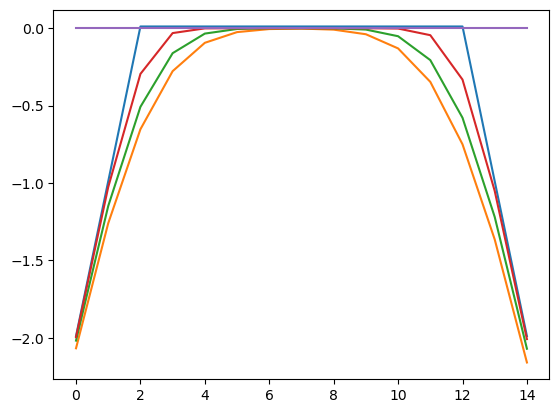

[0.007127774842713874, 0.004213771776549691]